In [1]:
import matplotlib.pyplot as plt
import numpy as np

import data_handling
import utils
from gaussian_spectral_clustering import (compute_pcs_and_project,
                                          initial_class_assignment,
                                          iterate_clustering,
                                          compute_class_statistics,
                                          compute_posterior_probability_and_assign,
                                          compute_multivariate_gaussian_statistics
                                         )
%matplotlib inline

In [2]:
# matplotlib settings for figure size and colormap
plt.rcParams['figure.figsize'] = [20, 15];
plt.rcParams['image.cmap'] = plt.gray();

<Figure size 1440x1080 with 0 Axes>

In [3]:
hsi_data_mat, sz, truth_data_mat = data_handling.load_aviris_data('sample-data-master/92AV3C.lan')

## Compute PCs and Project

In [4]:
x_pca, eig_vecs = compute_pcs_and_project(hsi_data_mat)

In [5]:
def reshape_pca_band(X, band, sz):
    nl, ns, nb = sz
    # return X.transpose().reshape([nl, ns, nb], order='F')[:, :, band]
    return X[band, :].reshape([nl, ns], order='F')

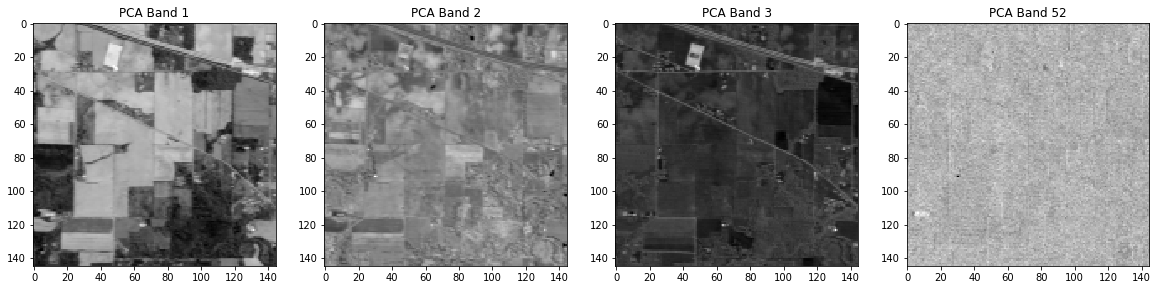

In [6]:
# Plot various bands from the image
# Squeeze() is needed to remove the single-dimensional band dimension
# before plotting (e.g. (nl, ns, 1) -> (nl, ns))
f, (plot1, plot2, plot3, plot4) = plt.subplots(1, 4)
plot1.imshow(reshape_pca_band(x_pca, 0, sz), cmap=plt.gray());
plot1.set_title('PCA Band 1');

plot2.imshow(reshape_pca_band(x_pca, 1, sz), cmap=plt.gray());
plot2.set_title('PCA Band 2');

plot3.imshow(reshape_pca_band(x_pca, 2, sz), cmap=plt.gray());
plot3.set_title('PCA Band 3');

plot4.imshow(reshape_pca_band(x_pca, 51, sz), cmap=plt.gray());
plot4.set_title('PCA Band 52');

## Split data into leading and trailing-order PCs

In [7]:
# Number of leading order PCs (i.e. bands [0, K])
K = 3

leading_order_pcs = x_pca[:K, :]
trailing_order_pcs = x_pca[K:, :]

## (Optional) Cull Pixels

In [8]:
#outlier_ixs = compute_multivariate_gaussian_statistics(trailing_order_pcs)

In [9]:
#leading_order_pcs = np.delete(leading_order_pcs, outlier_ixs, axis=1)

## Initial Class Assignment (leading-order PCs)

In [10]:
num_classes = 7

In [11]:
cmi, cm, cc = initial_class_assignment(leading_order_pcs, num_classes)

In [12]:
#cmi, cm, cc = initial_class_assignment(leading_order_pcs, num_classes, method='select', init_indices=[blue_ix[0], brown_ix[0], camo_ix[0], white_ix[0], black_ix[0], background_ix[500], background_ix[50000]])

In [13]:
np.random.seed(12345)
final_class_ixs = iterate_clustering(leading_order_pcs, cmi, num_classes, 500)

class counts [3127 2982 3002 2925 2958 2980 3051]
Finished iteration # 0
class counts [3344 2892 3061 2825 3007 2878 3018]
Finished iteration # 1
class counts [3585 2811 3043 2879 3150 2672 2885]
Finished iteration # 2
class counts [3845 2770 2945 2856 3190 2566 2853]
Finished iteration # 3
class counts [4068 2774 2934 2677 3093 2729 2750]
Finished iteration # 4
class counts [4349 2694 2817 2472 3054 2946 2693]
Finished iteration # 5
class counts [4711 2554 2770 2352 2971 2987 2680]
Finished iteration # 6
class counts [5047 2413 2806 2299 2851 2914 2695]
Finished iteration # 7
class counts [5406 2248 2962 2289 2694 2667 2759]
Finished iteration # 8
class counts [5824 2074 3176 2319 2487 2383 2762]
Finished iteration # 9
class counts [6091 1935 3605 2237 2260 1988 2909]
Finished iteration # 10
class counts [6216 1819 4038 2167 2144 1640 3001]
Finished iteration # 11
class counts [6244 1777 4286 2226 1988 1369 3135]
Finished iteration # 12
class counts [6151 1698 4359 2420 1942 1193 3262

class counts [3477 3003 3605 4146 3161  564 3069]
Finished iteration # 119
class counts [3458 2970 3579 4148 3210  566 3094]
Finished iteration # 120
class counts [3448 2945 3579 4158 3240  566 3089]
Finished iteration # 121
class counts [3447 2964 3607 4150 3218  579 3060]
Finished iteration # 122
class counts [3475 3026 3655 4096 3162  588 3023]
Finished iteration # 123
class counts [3440 3023 3671 4084 3197  592 3018]
Finished iteration # 124
class counts [3461 3057 3651 4126 3124  575 3031]
Finished iteration # 125
class counts [3478 2987 3663 4113 3133  583 3068]
Finished iteration # 126
class counts [3471 3001 3597 4174 3133  575 3074]
Finished iteration # 127
class counts [3477 2980 3592 4167 3184  560 3065]
Finished iteration # 128
class counts [3482 2998 3629 4103 3143  576 3094]
Finished iteration # 129
class counts [3473 3004 3634 4123 3147  564 3080]
Finished iteration # 130
class counts [3467 3013 3668 4097 3134  572 3074]
Finished iteration # 131
class counts [3454 3050 3

class counts [3455 3060 3597 4138 3158  559 3058]
Finished iteration # 233
class counts [3423 3113 3670 4055 3188  568 3008]
Finished iteration # 234
class counts [3436 3083 3666 4066 3234  574 2966]
Finished iteration # 235
class counts [3432 3034 3708 4024 3249  589 2989]
Finished iteration # 236
class counts [3446 3039 3651 4070 3206  582 3031]
Finished iteration # 237
class counts [3434 2978 3643 4087 3238  587 3058]
Finished iteration # 238
class counts [3405 3056 3644 4095 3264  594 2967]
Finished iteration # 239
class counts [3392 3137 3640 4123 3213  597 2923]
Finished iteration # 240
class counts [3394 3146 3617 4150 3211  596 2911]
Finished iteration # 241
class counts [3417 3172 3644 4119 3178  595 2900]
Finished iteration # 242
class counts [3413 3123 3681 4059 3222  601 2926]
Finished iteration # 243
class counts [3410 3140 3701 4010 3208  587 2969]
Finished iteration # 244
class counts [3362 3197 3671 4035 3229  563 2968]
Finished iteration # 245
class counts [3387 3187 3

class counts [3448 2973 3631 4145 3308  570 2950]
Finished iteration # 346
class counts [3429 2991 3607 4170 3328  562 2938]
Finished iteration # 347
class counts [3418 3028 3634 4109 3312  583 2941]
Finished iteration # 348
class counts [3430 3024 3640 4098 3314  592 2927]
Finished iteration # 349
class counts [3423 3013 3624 4104 3300  556 3005]
Finished iteration # 350
class counts [3415 2981 3658 4074 3328  561 3008]
Finished iteration # 351
class counts [3420 2988 3669 4052 3310  558 3028]
Finished iteration # 352
class counts [3416 2987 3672 4057 3300  588 3005]
Finished iteration # 353
class counts [3408 2981 3669 4083 3269  590 3025]
Finished iteration # 354
class counts [3386 2947 3635 4106 3315  628 3008]
Finished iteration # 355
class counts [3378 3014 3601 4137 3287  599 3009]
Finished iteration # 356
class counts [3390 3033 3636 4085 3257  622 3002]
Finished iteration # 357
class counts [3412 2984 3660 4080 3304  638 2947]
Finished iteration # 358
class counts [3436 3021 3

class counts [3462 2734 3706 4069 3393  530 3131]
Finished iteration # 456
class counts [3432 2720 3694 4083 3394  554 3148]
Finished iteration # 457
class counts [3400 2707 3723 4036 3418  557 3184]
Finished iteration # 458
class counts [3402 2673 3692 4086 3448  562 3162]
Finished iteration # 459
class counts [3416 2693 3665 4096 3437  560 3158]
Finished iteration # 460
class counts [3414 2707 3642 4143 3394  549 3176]
Finished iteration # 461
class counts [3441 2720 3656 4137 3301  568 3202]
Finished iteration # 462
class counts [3465 2716 3663 4099 3276  572 3234]
Finished iteration # 463
class counts [3462 2735 3699 4052 3301  565 3211]
Finished iteration # 464
class counts [3459 2788 3675 4057 3296  573 3177]
Finished iteration # 465
class counts [3500 2753 3663 4076 3308  575 3150]
Finished iteration # 466
class counts [3473 2781 3699 4058 3341  583 3090]
Finished iteration # 467
class counts [3478 2832 3702 4052 3318  578 3065]
Finished iteration # 468
class counts [3485 2786 3

In [14]:
# Code taken from https://github.com/bids/colormap/blob/master/parula.py to create the Parula colormap
# Parula is MATLAB's default and is being used to better compare this Python code to the MATLAB results given
from matplotlib.colors import LinearSegmentedColormap

cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)

plt.register_cmap(cmap=parula_map)
cmap = plt.get_cmap('parula')

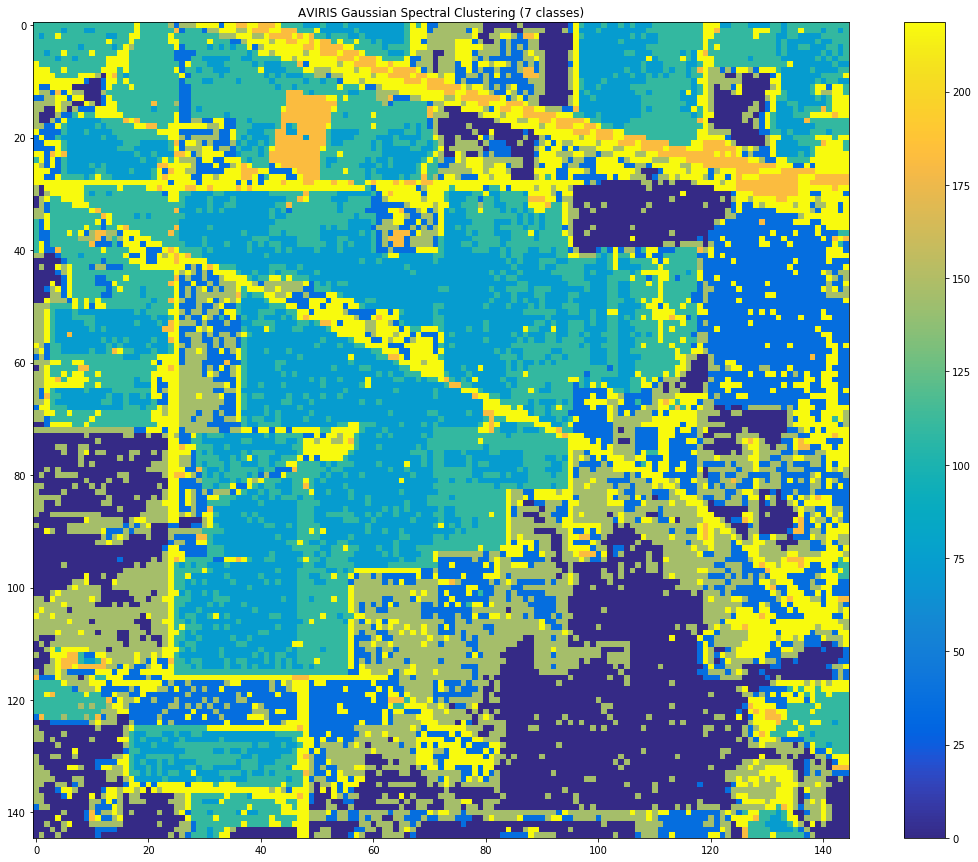

In [15]:
#fig, axs = plt.subplots(nrows=10, ncols=1);
nl, ns, nb = sz
fig, axs = plt.subplots(nrows=1, ncols=1);
cmap = plt.get_cmap('parula')

im = axs.imshow((final_class_ixs.reshape([nl, ns], order='F') * 255/num_classes), cmap=cmap);
axs.set_title('AVIRIS Gaussian Spectral Clustering ({} classes)'.format(num_classes))

fig.colorbar(im, ax=axs);

In [16]:
from sklearn.cluster import KMeans

In [17]:
km = KMeans(n_clusters=num_classes).fit(hsi_data_mat.transpose())

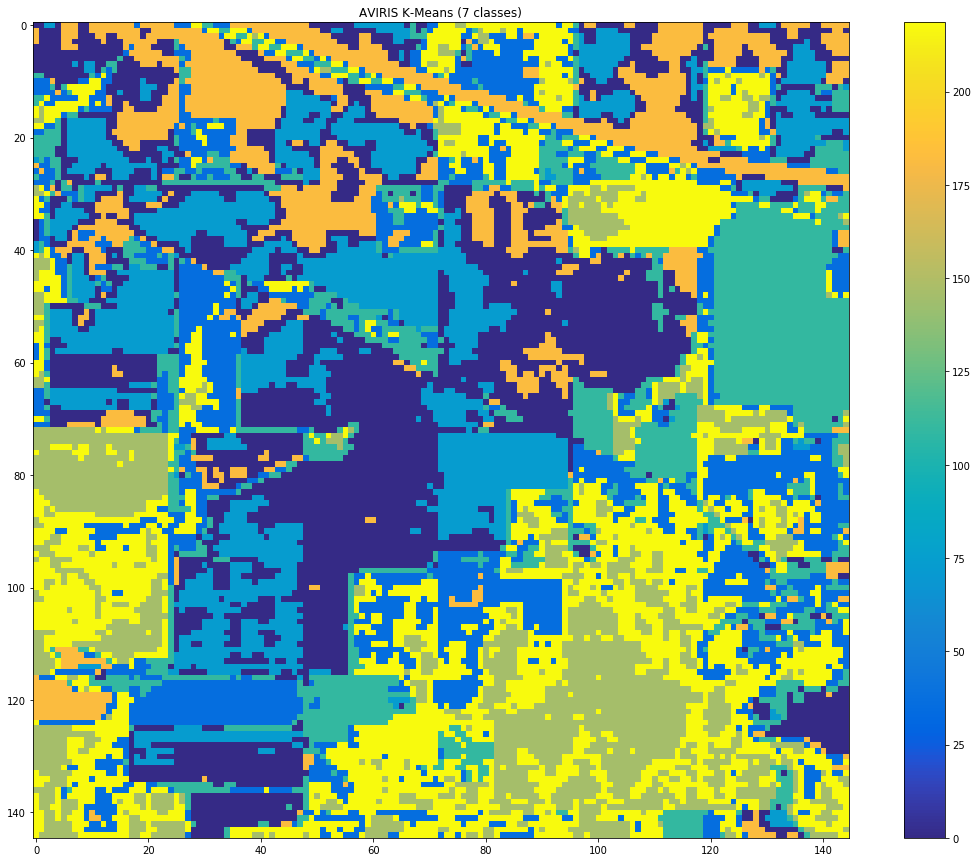

In [18]:
#fig, axs = plt.subplots(nrows=10, ncols=1);
nl, ns, nb = sz
fig, axs = plt.subplots(nrows=1, ncols=1);
cmap = plt.get_cmap('parula')

im = axs.imshow(km.labels_.reshape([nl, ns], order='F') * 255/num_classes, cmap=cmap);
#im = axs.imshow((km.labels_.reshape([nl, ns], order='F') * 255/num_classes), cmap=cmap);
axs.set_title('AVIRIS K-Means ({} classes)'.format(num_classes))
fig.colorbar(im, ax=axs);

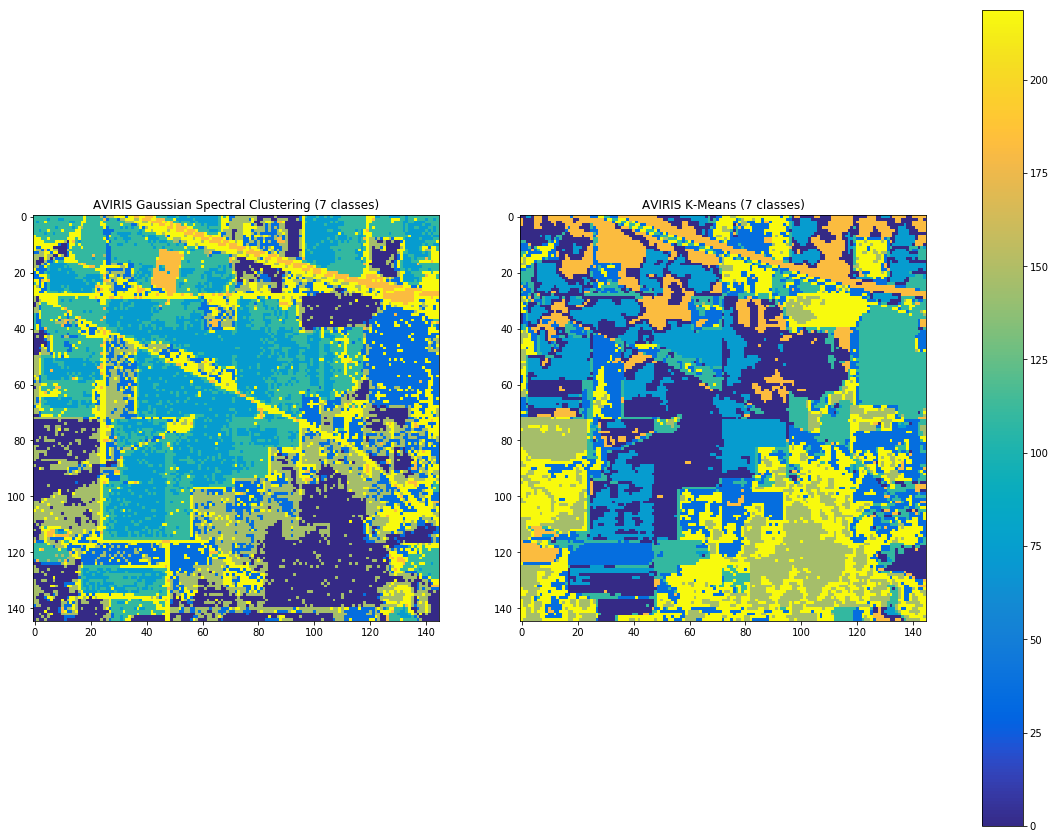

In [19]:
# Side by side comparison
fig, axs = plt.subplots(nrows=1, ncols=2);
cmap = plt.get_cmap('parula')

gsc_im = axs[0].imshow((final_class_ixs.reshape([nl, ns], order='F') * 255/num_classes), cmap=cmap);
km_im = axs[1].imshow((km.labels_.reshape([nl, ns], order='F') * 255/num_classes), cmap=cmap);

axs[0].set_title('AVIRIS Gaussian Spectral Clustering ({} classes)'.format(num_classes))
axs[1].set_title('AVIRIS K-Means ({} classes)'.format(num_classes))
#fig.subplots_adjust(right=0.8)
#cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(gsc_im, ax=axs);